# Project: Survey analysis
This project is to analyze **data** obtained from the survey made earlier in class.

In [82]:
__author__ = "730410140"

## Primary question?
How many computer science major/minor students take comp_110?

## Hypothesis : Most computer science majors already know a bit of coding and would place out of comp_110.

Here I  will implement the utility functions for this project in the `data_utils.py` file found in the `project/pj01` directory. 

In [83]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your work in other modules!")

Autoreload of imported modules enabled. Be sure to save your work in other modules!


I will store data in the `data` directory of the workspace.  The constant `DATA_DIRECTORY` defined below uses the convention of two dots to refer to "one directory up", so it is a `str` that references the `data` directory _relative_ to this projects's directory.

In [84]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

 ### I will read  the data in row format from the csv
* Function Name: `read_csv_rows`
* Parameter: 
    1. `str` path to CSV file
* Return Type: `list[dict[str, str]]` 


In [85]:
from data_utils import read_csv_rows
data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)

if len(data_rows) == 0:
    print("Go implement read_csv_rows in data_utils.py")
    print("Be sure to save your work before re-evaluating this cell!")
else:
    print(f"Data File Read: {DATA_FILE_PATH}")
    print(f"{len(data_rows)} rows")
    print(f"{len(data_rows[0].keys())} columns")
    print(f"Columns names: {data_rows[0].keys()}")

Data File Read: ../../data/survey.csv
573 rows
36 columns
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'section', 'in_person_classes', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


Then I will  **Produce** a `list[str]` of all values in a single `column` whose name is the second parameter.

* Function Name: `column_values`
* Parameters: 
    1. `list[dict[str, str]]` - a list of rows representing a _table_
    2. `str` - the name of the column (key) whose values are being selected
* Return Type: `list[str]`

This will contain the column form of the data

In [86]:
from data_utils import column_values

comp_major: list[str] = column_values(data_rows, "comp_major")
primary_major: list[str] = column_values(data_rows, "primary_major")

if len(comp_major) == 0:
    print("Complete your implementation of column_values in data_utils.py")
    print("Be sure to follow the guidelines above and save your work before re-evaluating!")
else:
    print(f"Column 'comp_major' has {len(comp_major)} values.")
    print("The responses from the class:")
    for i in range(len(comp_major)):
        print(comp_major[i])


Column 'comp_major' has 573 values.
The responses from the class:
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes - Minor
No
No
No
No
No
No
No
No
No
No
No
Yes - BS
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes - Minor
No
No
No
No
No
No
No
No
Yes - Minor
No
No
No
No
Yes - Minor
No
No
No
Yes - Minor
No
Yes - Minor
No
No
No
No
No
No
No
Yes - BA
No
Yes - Minor
No
Yes - Minor
No
No
Yes - BS
Yes - BA
No
Yes - BA
No
No
No
Yes - Minor
No
Yes - Minor
No
No
No
No
No
No
Yes - BA
No
No
Yes - Minor
No
No
Yes - Minor
No
No
No
No
No
No
No
Yes - BA
Yes - BS
Yes - BA
Yes - BS
Yes - BS
Yes - BS
Yes - BA
Yes - BS
Yes - BS
Yes - BS
Yes - BS
Yes - BS
Yes - BS
Yes - BS
Yes - BS
Yes - BS
Yes - BS
Yes - BS
Yes - BA
Yes - BA
Yes - BS
Yes - BS
Yes - BS
Yes - BA
Yes - BA
Yes - BA
Yes - BS
Yes - BS
Yes - BA
Yes - BA
Yes - BS
Yes - BA
Yes - BS
Yes - BS
Yes - BS
Yes - BA
Yes - BS
Yes - BS
Yes - BA
Yes - BA
Yes - BS
Yes - BS
Yes - BA
Yes - BS
Y

### We will then transform the list table represented as a list of rows (e.g. `list[dict[str, str]]`) into one represented as a dictionary of columns (e.g. `dict[str, list[str]]`).

It is much simple to analyze data in this format

* Function Name: `columnar`
* Parameter: `list[dict[str, str]]` - a "table" organized as a list of rows
* Return Type: `dict[str, list[str]]` - a "table" organized as a dictionary of columns

In [87]:
from data_utils import columnar

data_cols: dict[str, list[str]] = columnar(data_rows)

if len(data_cols.keys()) == 0:
    print("Complete your implementation of columnar in data_utils.py")
    print("Be sure to follow the guidelines above and save your work before re-evaluating!")
else:
    print(f"{len(data_cols.keys())} columns")
    print(f"{len(data_cols['comp_major'])} rows")
    print(f"Columns names: {data_cols.keys()}")

36 columns
573 rows
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'section', 'in_person_classes', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


### Here, data is written in tabulate form which can be well analyzed.
* Function name: `head`
* Parameters:
    1. `dict[str, list[str]]` - a column-based table of data that _will not be mutated_
    2. `int` - The number of "rows" to include in the resulting list
* Return type: `dict[str, list[str]]`


In [88]:
from data_utils import head
from tabulate import tabulate

data_cols_head: dict[str, list[str]] = head(data_cols, len(comp_major))

if len(data_cols_head.keys()) != len(data_cols.keys()) or len(data_cols_head["comp_major"]) != 5:
    print("Complete your implementation of columnar in data_utils.py")
   
tabulate(data_cols_head, data_cols_head.keys(), "html")

Complete your implementation of columnar in data_utils.py


row_number,year,unc_status,comp_major,primary_major,data_science,prereqs,prior_exp,AP_Principles,AP_A,other_comp,prior_time,languages,section,in_person_classes,hours_online_social,hours_online_work,lesson_time,sync_perf,all_sync,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,kaki_effective,pace,difficulty,understanding,interesting,valuable,would_recommend
0,23,Returning UNC Student,No,Advertising and Public Relations,No,"MATH 129P, MATH 130",None to less than one month!,,,,,,In-Person,,3 to 5 hours,3 to 5 hours,5,2,2,4,2,2,7,6,6,5,5,,3,5,5,4,5,6,7
1,24,Returning UNC Student,No,Anthropology,No,"MATH 129P, MATH 231",None to less than one month!,,,,,,In-Person,,5 to 10 hours,5 to 10 hours,4,5,4,7,6,0,6,5,7,5,,,6,5,3,7,7,7,7
2,23,Returning UNC Student,No,Biology,No,"MATH 231, MATH 232, MATH 233, MATH 381",None to less than one month!,,,,,,Remote,Yes,3 to 5 hours,5 to 10 hours,2,1,1,7,6,0,7,7,7,7,,,,5,5,6,7,7,7
3,24,Returning UNC Student,No,Biology,No,"MATH 130, MATH 231",None to less than one month!,,,,,,,Yes,5 to 10 hours,5 to 10 hours,2,3,1,6,4,4,7,7,7,7,7,7,7,6,6,4,5,4,7
4,22,Returning UNC Student,No,Biology,No,"MATH 129P, MATH 130, MATH 231, MATH 232, MATH 233",None to less than one month!,,,,,,Remote,Yes,3 to 5 hours,3 to 5 hours,3,1,1,5,4,1,6,6,7,5,,,,5,4,4,6,6,7
5,24,Incoming Transfer Student,No,Biology,Maybe,"MATH 129P, MATH 231, STOR 151",Over 2 years,Yes,Yes,High school course (IB or other),None to less than one month!,"Python, Java / C#, JavaScript / TypeScript, HTML / CSS, net beans, MIT app inventor",Remote,Yes,0 to 2 hours,5 to 10 hours,6,4,3,7,6,1,5,5,4,5,,,7,5,5,6,5,4,4
6,22,Returning UNC Student,No,Biology,No,STOR 155,None to less than one month!,,,,,,Remote,Yes,5 to 10 hours,3 to 5 hours,2,2,2,4,4,0,6,6,4,5,3,3,5,6,6,4,4,6,6
7,24,Returning UNC Student,No,Biology,No,MATH 130,None to less than one month!,,,,,,Remote,Yes,3 to 5 hours,5 to 10 hours,7,2,1,7,5,1,6,5,6,4,4,4,4,5,5,4,5,5,4
8,24,Returning UNC Student,No,Biology,No,"MATH 231, MATH 232, STOR 155",None to less than one month!,,,,,,Remote,Yes,5 to 10 hours,3 to 5 hours,6,5,3,7,3,1,6,7,7,7,,,5,4,5,5,7,6,6
9,22,Returning UNC Student,No,Biology,No,"MATH 231, MATH 232, MATH 233, PSYC 210, STOR 155",None to less than one month!,,,,,,Remote,Yes,5 to 10 hours,5 to 10 hours,2,3,2,6,4,2,7,7,7,6,4,7,7,7,7,3,5,6,5


### We have  a big table now we narrow it down to the part we wannt to look at and analyze
* Function Name: `select`
* Parameters:
    1. `dict[str, list[str]]` - a column-based table of data that _will not be mutated_
    2. `list[str]` - the names of the columns to copy to the new, returned dictionary
* Return type: `dict[str, list[str]]`


In [89]:
from data_utils import select

selected_data: dict[str, list[str]] = select(data_cols, ["primary_major", "comp_major"])

tabulate(head(selected_data, 573), selected_data.keys(), "html")

primary_major,comp_major
Advertising and Public Relations,No
Anthropology,No
Biology,No
Biology,No
Biology,No
Biology,No
Biology,No
Biology,No
Biology,No
Biology,No


### Here I count the number of students who are Computer science major if they aren't then what's their primary major?
***I do this by***
1. Establish an empty dictionary to store your built-up result in
2. Loop through each item in the input list
    1. Check to see if that item has already been established as a key in your dictionary. Try the following boolean conditional: `if <item> in <dict>:` -- replacing `<item>` with the variable name of the current value and `<dict>` with the name of your result dictionary.
    2. If the item is found in the dict, that means there is already a key/value pair where the item is a key. Increase the value associated with that key by 1 (counting it!)
    3. If the item is not found in the dict, that means this is the first time you are encountering the value and should assign an initial count of `1` to that key in the result dictionary.
3. Return the resulting dictionary.

In [90]:
from data_utils import count

comp_major_counts: dict[str, int] = count(selected_data["comp_major"])
print(f"comp_major_counts: {comp_major_counts}")

primary_major_counts: dict[str, int] = count(selected_data["primary_major"])
print(f"primary_major_counts: {primary_major_counts}")

comp_major_counts: {'No': 404, 'Yes - Minor': 33, 'Yes - BS': 88, 'Yes - BA': 48}
primary_major_counts: {'Advertising and Public Relations': 1, 'Anthropology': 1, 'Biology': 59, 'Biostatistics': 6, 'Biostatistics ': 5, 'Business': 51, 'Chemistry': 5, 'Communications': 3, 'Computer Science': 119, 'Economics': 42, 'English': 3, 'Environmental Science': 14, 'Environmental Science ': 8, 'Exercise and Sports Science': 7, 'Geology': 1, 'Global Studies': 1, 'Health Policy and Management': 3, 'History': 3, 'Information Science': 14, 'Information science': 1, 'Information Science ': 4, 'Journalism': 6, 'Math': 7, 'Math ': 12, 'Neuroscience': 33, 'Neuroscience ': 15, 'Nursing': 2, 'Nutrition': 2, 'Peace, War, and Defense': 5, 'Physics': 4, 'Political Science': 5, 'Psychology': 38, 'Psychology ': 37, 'Public Health': 3, 'Public Policy': 4, 'Sociology': 1, 'Spanish': 1, 'Statistics': 8, 'Statistics ': 21, 'Undecided': 18}


### Graph
Next I draw a graph to show a pictorial representation of the data.

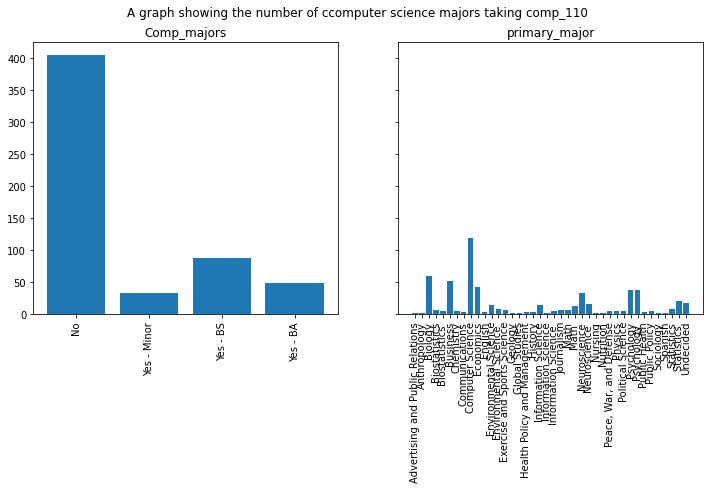

In [91]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("A graph showing the number of ccomputer science majors taking comp_110")


axes[0].set_title("Comp_majors")
axes[0].bar(comp_major_counts.keys(), comp_major_counts.values())
axes[0].tick_params(axis='x', labelrotation = 90)

axes[1].set_title("primary_major")
axes[1].bar(primary_major_counts.keys(), primary_major_counts.values())
axes[1].tick_params(axis='x', labelrotation = 90)
plt.show()

### Data analyzes

It could be seen that most of those  taking this class are not computer science majors. The least group are the students minoring in computer science.Out of the 573 students, 404 are not computer science majors. It could also be seen that , there are more students majoring in the Bs version than the BA.
However from the second graph it couild be seen that there are more computer science major students than any other primary major.

### Conclusion
This agrees with my ***hypothesis*** that most of the computer science majors/minors have some background in coding and would place out of comp 110.It could be seen also that  most students may be taking this class as prequisite for other courses or for their personal curiosity.
